In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning)

#### Preprocessing

In [2]:
train = pd.read_excel('wine.xlsx', sheet_name = 1)

In [3]:
train.head()

,sales,nps,marketing_spend,products,week,quarter
0,1068.373613,4.814643,442.307692,wine 2,2015-01-04,20151
1,991.549204,4.667250,442.307692,wine 2,2015-01-11,20151
2,1024.506644,5.458043,442.307692,wine 2,2015-01-18,20151
3,1029.645610,5.034918,442.307692,wine 2,2015-01-25,20151
4,850.076677,4.555107,442.307692,wine 2,2015-02-01,20151


In [4]:
#Unlikely have outliers
train.describe()

,sales,nps,marketing_spend,quarter
count,248.000000,214.000000,248.000000,248.000000
mean,3033.425011,6.338144,282.094603,20171.387097
std,779.378545,1.502464,179.805305,13.654030
min,850.076677,3.986033,21.384615,20151.000000
25%,2615.405298,4.955037,95.615385,20161.000000
50%,3063.220296,5.973871,298.076923,20172.000000
75%,3606.722656,7.798541,405.076923,20183.000000
max,4588.334684,9.092041,586.923077,20193.000000


In [5]:
#nps have missing values
train.isna().sum()

sales               0
nps                34
marketing_spend     0
products            0
week                0
quarter             0
dtype: int64

### 1.1 NPS Imputation

In [6]:
train[train['nps'].isna()] = train['nps'].mean()

In [7]:
train.head()

,sales,nps,marketing_spend,products,week,quarter
0,1068.373613,4.814643,442.307692,wine 2,2015-01-04 00:00:00,20151.0
1,991.549204,4.667250,442.307692,wine 2,2015-01-11 00:00:00,20151.0
2,1024.506644,5.458043,442.307692,wine 2,2015-01-18 00:00:00,20151.0
3,1029.645610,5.034918,442.307692,wine 2,2015-01-25 00:00:00,20151.0
4,850.076677,4.555107,442.307692,wine 2,2015-02-01 00:00:00,20151.0


### 1.2 One hot encoded

In [8]:
train['products'].unique()

array(['wine 2', 6.338143797535718, 'wine 1,wine 3', 'wine 2,wine 3',
       'wine 2,wine 1,wine 3', 'wine 2,wine 1', 'wine 1,wine 2,wine 3',
       'wine 3,wine 1', 'wine 1,wine 3,wine 2', 'wine 3'], dtype=object)

In [9]:
train = train[train['products'] != 6.338143797535718]
train

,sales,nps,marketing_spend,products,week,quarter
0,1068.373613,4.814643,442.307692,wine 2,2015-01-04 00:00:00,20151.0
1,991.549204,4.667250,442.307692,wine 2,2015-01-11 00:00:00,20151.0
2,1024.506644,5.458043,442.307692,wine 2,2015-01-18 00:00:00,20151.0
3,1029.645610,5.034918,442.307692,wine 2,2015-01-25 00:00:00,20151.0
4,850.076677,4.555107,442.307692,wine 2,2015-02-01 00:00:00,20151.0
...,...,...,...,...,...,...
243,2917.459368,8.150907,233.692308,wine 3,2019-09-01 00:00:00,20193.0
244,3218.197977,8.257735,233.692308,wine 3,2019-09-08 00:00:00,20193.0
245,2846.655197,6.776199,233.692308,wine 3,2019-09-15 00:00:00,20193.0
246,3292.316290,7.758401,233.692308,wine 3,2019-09-22 00:00:00,20193.0


In [10]:
train['products'].unique()

array(['wine 2', 'wine 1,wine 3', 'wine 2,wine 3', 'wine 2,wine 1,wine 3',
       'wine 2,wine 1', 'wine 1,wine 2,wine 3', 'wine 3,wine 1',
       'wine 1,wine 3,wine 2', 'wine 3'], dtype=object)

In [11]:
train['wine1'] = 0
train['wine2'] = 0
train['wine3'] = 0
temp1 = np.zeros(len(train))
temp2 = np.zeros(len(train))
temp3 = np.zeros(len(train))
for j in range(len(train)):
    if "wine 1" in train.iloc[j]['products']:
        temp1[j] = 1
    if "wine 2" in train.iloc[j]['products']:
        temp2[j] = 1
    if "wine 3" in train.iloc[j]['products']:
        temp3[j] = 1
for i in range(len(train)):
    if temp1[i] == 1:
        train['wine1'] = temp1
    if temp2[i] == 1:
        train['wine2'] = temp2
    if temp3[i] == 1:
        train['wine3'] = temp3
        
train

,sales,nps,marketing_spend,products,week,quarter,wine1,wine2,wine3
0,1068.373613,4.814643,442.307692,wine 2,2015-01-04 00:00:00,20151.0,0.0,1.0,0.0
1,991.549204,4.667250,442.307692,wine 2,2015-01-11 00:00:00,20151.0,0.0,1.0,0.0
2,1024.506644,5.458043,442.307692,wine 2,2015-01-18 00:00:00,20151.0,0.0,1.0,0.0
3,1029.645610,5.034918,442.307692,wine 2,2015-01-25 00:00:00,20151.0,0.0,1.0,0.0
4,850.076677,4.555107,442.307692,wine 2,2015-02-01 00:00:00,20151.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
243,2917.459368,8.150907,233.692308,wine 3,2019-09-01 00:00:00,20193.0,0.0,0.0,1.0
244,3218.197977,8.257735,233.692308,wine 3,2019-09-08 00:00:00,20193.0,0.0,0.0,1.0
245,2846.655197,6.776199,233.692308,wine 3,2019-09-15 00:00:00,20193.0,0.0,0.0,1.0
246,3292.316290,7.758401,233.692308,wine 3,2019-09-22 00:00:00,20193.0,0.0,0.0,1.0


### 2.1 From weekly to quarterly

In [12]:
new_df = pd.DataFrame(train.groupby(['quarter']).sum()['sales'])

In [13]:
new_df['wine1'] = train.groupby(['quarter']).first()['wine1']
new_df['wine2'] = train.groupby(['quarter']).first()['wine2']
new_df['wine3'] = train.groupby(['quarter']).first()['wine3']

In [14]:
new_df['nps'] = train.groupby(['quarter']).mean()['nps']

In [15]:
new_df['marketing_spend'] = train.groupby(['quarter']).sum()['marketing_spend']

### 2.2 Shift features

In [16]:
new_df.loc[20194.0] = [np.nan, 1,1,0,np.nan,np.nan]
new_df

,sales,wine1,wine2,wine3,nps,marketing_spend
quarter,,,,,,
20151.0,12290.306754,0.0,1.0,0.0,5.040338,5307.692308
20152.0,34535.052277,1.0,0.0,1.0,4.889059,1278.461538
20153.0,30902.972422,0.0,1.0,1.0,5.069408,1791.307692
20154.0,24724.921541,0.0,1.0,0.0,4.927345,3278.846154
20161.0,27252.472164,1.0,1.0,1.0,4.619928,3841.538462
20162.0,40556.700427,1.0,0.0,1.0,4.972015,448.615385
20163.0,29745.519682,0.0,1.0,1.0,4.904604,235.230769
20164.0,24633.515331,1.0,1.0,1.0,4.963019,3553.615385
20171.0,28098.994907,1.0,1.0,0.0,5.074186,782.769231


In [17]:
new_df['nps'] = new_df['nps'].shift(1)
new_df['marketing_spend'] = new_df['marketing_spend'].shift(1)
new_df = new_df.iloc[1:]
new_df

,sales,wine1,wine2,wine3,nps,marketing_spend
quarter,,,,,,
20152.0,34535.052277,1.0,0.0,1.0,5.040338,5307.692308
20153.0,30902.972422,0.0,1.0,1.0,4.889059,1278.461538
20154.0,24724.921541,0.0,1.0,0.0,5.069408,1791.307692
20161.0,27252.472164,1.0,1.0,1.0,4.927345,3278.846154
20162.0,40556.700427,1.0,0.0,1.0,4.619928,3841.538462
20163.0,29745.519682,0.0,1.0,1.0,4.972015,448.615385
20164.0,24633.515331,1.0,1.0,1.0,4.904604,235.230769
20171.0,28098.994907,1.0,1.0,0.0,4.963019,3553.615385
20172.0,28280.792108,1.0,1.0,1.0,5.074186,782.769231


### 1.3* Challenge: Seasonality

In [18]:
new_df = new_df.reset_index()

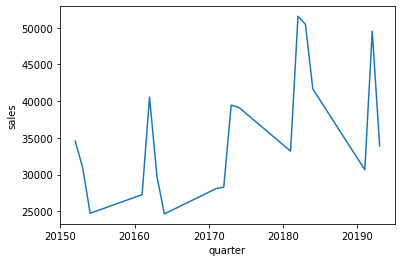

In [19]:
sns.lineplot(new_df['quarter'],new_df['sales'])

So indeed seasonality exists. Let's encoded

In [20]:
new_df['q1'] = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0]
new_df['q2'] = [1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0]
new_df['q3'] = [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0]
new_df['q4'] = [0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1]

In [21]:
new_df

,quarter,sales,wine1,wine2,wine3,nps,marketing_spend,q1,q2,q3,q4
0,20152.0,34535.052277,1.0,0.0,1.0,5.040338,5307.692308,0,1,0,0
1,20153.0,30902.972422,0.0,1.0,1.0,4.889059,1278.461538,0,0,1,0
2,20154.0,24724.921541,0.0,1.0,0.0,5.069408,1791.307692,0,0,0,1
3,20161.0,27252.472164,1.0,1.0,1.0,4.927345,3278.846154,1,0,0,0
4,20162.0,40556.700427,1.0,0.0,1.0,4.619928,3841.538462,0,1,0,0
5,20163.0,29745.519682,0.0,1.0,1.0,4.972015,448.615385,0,0,1,0
6,20164.0,24633.515331,1.0,1.0,1.0,4.904604,235.230769,0,0,0,1
7,20171.0,28098.994907,1.0,1.0,0.0,4.963019,3553.615385,1,0,0,0
8,20172.0,28280.792108,1.0,1.0,1.0,5.074186,782.769231,0,1,0,0
9,20173.0,39448.494280,1.0,0.0,1.0,5.333234,5062.153846,0,0,1,0


### 2.3 Corr

In [22]:
new_df.drop(columns = ['quarter'], inplace = True)
new_df

,sales,wine1,wine2,wine3,nps,marketing_spend,q1,q2,q3,q4
0,34535.052277,1.0,0.0,1.0,5.040338,5307.692308,0,1,0,0
1,30902.972422,0.0,1.0,1.0,4.889059,1278.461538,0,0,1,0
2,24724.921541,0.0,1.0,0.0,5.069408,1791.307692,0,0,0,1
3,27252.472164,1.0,1.0,1.0,4.927345,3278.846154,1,0,0,0
4,40556.700427,1.0,0.0,1.0,4.619928,3841.538462,0,1,0,0
5,29745.519682,0.0,1.0,1.0,4.972015,448.615385,0,0,1,0
6,24633.515331,1.0,1.0,1.0,4.904604,235.230769,0,0,0,1
7,28098.994907,1.0,1.0,0.0,4.963019,3553.615385,1,0,0,0
8,28280.792108,1.0,1.0,1.0,5.074186,782.769231,0,1,0,0
9,39448.494280,1.0,0.0,1.0,5.333234,5062.153846,0,0,1,0


In [23]:
#The last row is for 2019Q4, so not include for correlation
new_df[:-1].corr()

,sales,wine1,wine2,wine3,nps,marketing_spend,q1,q2,q3,q4
sales,1.000000,0.359325,-0.258473,0.381403,0.613463,0.584514,-0.360955,0.401410,0.106045,-0.185759
wine1,0.359325,1.000000,-0.094491,0.236228,0.177060,0.258618,0.285714,0.331497,-0.563545,-0.035714
wine2,-0.258473,-0.094491,1.000000,-0.250000,-0.103632,-0.412781,0.094491,-0.350823,-0.087706,0.377964
wine3,0.381403,0.236228,-0.250000,1.000000,0.290972,0.091105,-0.236228,0.219265,0.219265,-0.236228
nps,0.613463,0.177060,-0.103632,0.290972,1.000000,0.476915,0.082565,-0.032307,0.025322,-0.075039
marketing_spend,0.584514,0.258618,-0.412781,0.091105,0.476915,1.000000,0.098484,0.218512,0.212506,-0.562846
q1,-0.360955,0.285714,0.094491,-0.236228,0.082565,0.098484,1.000000,-0.331497,-0.331497,-0.285714
q2,0.401410,0.331497,-0.350823,0.219265,-0.032307,0.218512,-0.331497,1.000000,-0.384615,-0.331497
q3,0.106045,-0.563545,-0.087706,0.219265,0.025322,0.212506,-0.331497,-0.384615,1.000000,-0.331497
q4,-0.185759,-0.035714,0.377964,-0.236228,-0.075039,-0.562846,-0.285714,-0.331497,-0.331497,1.000000


**Corr** suggests only **nps** and **q2** are significant. But I doubt whether the correlation itself make sense. So we can fit the model by **nps** and **q2**, but also fit the full model to see the effcts

### 3.1&3.2 Regression and Prediction

Coefficients: 
 [ 0.3403032   0.02129604 -0.10057495  0.40262223  0.16844107 -0.31673608
  0.15360786  0.19042178 -0.02729356]


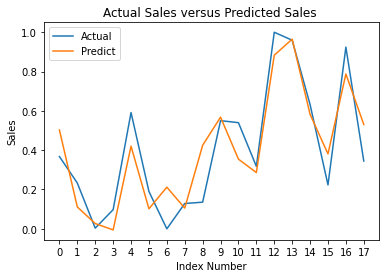

Coefficient of determination: 0.81
Quarterly prediction for 2019Q4: [43341.88665055]


In [24]:
mini=np.min(new_df['sales'])
interval=np.max(new_df['sales'])-np.min(new_df['sales'])
new_df=new_df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

def regression_func(df):
    lr=LinearRegression()
    x_201904=df.drop(columns='sales').iloc[-1]
    X=df.drop(columns='sales')[:-1]
    y=df['sales'][:-1]
    reg=lr.fit(X.values,y.values)
    print("Coefficients: \n", reg.coef_)
    return reg,X,y,x_201904

def backtest(df):
    reg,X,y,x_201904=regression_func(df)
    y_pred= reg.predict(X.values)

    plt.plot(X.index, y.values, label = "Actual")
    plt.plot(X.index, y_pred, label = "Predict")
    plt.xlabel('Index Number')
    plt.ylabel('Sales')
    plt.title('Actual Sales versus Predicted Sales ')
    x_major_locator=plt.MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.legend()
    plt.show()
    print("Coefficient of determination: %.2f" % r2_score(y, y_pred))
    y_Q4_2019=reg.predict(pd.DataFrame(x_201904).T.values)
    return y_Q4_2019
a=backtest(new_df)
print("Quarterly prediction for 2019Q4:",a*interval+mini)

### Based on the regression coefficients, we can see the coefficient of the variable 'nps' has the largest absolute value. Thus, it is the most important feature in our regression model.
### Using this model, we predict that sales in 2019Q4 will be 43341.89